# Some simple investigation of Taylor series

## Let's start with the Taylor series for sin(x)

In [1]:
import numpy as np
from numpy import linspace, pi, sin, zeros_like
import scipy as sp
from scipy.misc import factorial
import matplotlib.pyplot as plt
#%matplotlib inline
from matplotlib import animation
from ipywidgets import interact,fixed
%matplotlib inline

ImportError: cannot import name 'factorial' from 'scipy.misc' (C:\Users\johns\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\scipy\misc\__init__.py)

Now, we know $$sin(x) = x - \frac{x^3}{3!} + \frac{x^5}{5!} - O(x^7) = \sum_{k=0}^{\infty}\frac{(-1)^k x^{(1+2k)}}{(1+2k)!}$$

Note that we've been clever here, so that the index can run over all terms rather than just explicitly setting the odd terms to zero.

Let's draw a couple of these

In [ ]:
x = linspace(-4*pi,4*pi,2000)

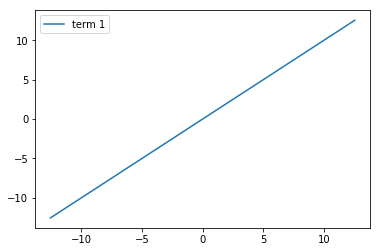

In [ ]:
plt.plot(x,x,label='term 1')
plt.legend(fancybox=True);

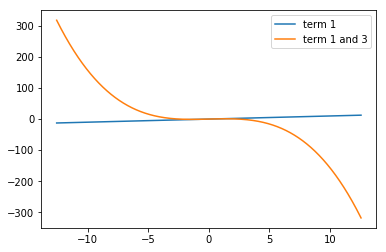

In [ ]:
plt.plot(x,x,label='term 1')
plt.plot(x,x-x**3/6,label='term 1 and 3')
plt.legend(fancybox=True);

So, let's narrow in a bit. We're approximating $sin(x)$, which should go from $+1$ to $-1$. Let's let the axis go from $+4 \to -4$.

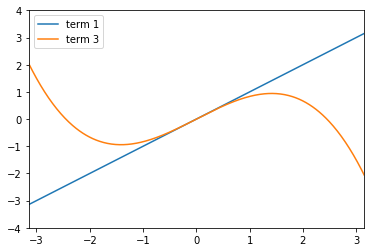

In [ ]:
plt.plot(x,x,label='term 1')
plt.plot(x,x-x**3/6,label='term 3')
plt.axis((-pi,pi,-4,4))
plt.legend(fancybox=True);

And now let's make it look nicer, and be more interactive, as well as showing the sum.

In [ ]:
def showterms(n=0,xmax=4*pi):
    x = linspace(-xmax,xmax,2000)
    total = zeros_like(x)
    plt.clf()
    plt.plot(x,np.sin(x),'.-',linewidth=4,color='red',label='sin(x)')
    for i in range(n+1):
        this_term = ((-1)**i * x**(1+2*i))/factorial(1+2*i)
        plt.plot(x,this_term,label='Term {i}'.format(i=i))
        total = total + this_term
    plt.plot(x,total,'--',linewidth=2,color='black',label='Sum')
    plt.axis((-xmax,xmax,-4,4))
    plt.grid(True)
    plt.legend(fancybox=True,loc='upper left',framealpha=0.5)
interact(showterms,n=(0,8),xmax=fixed(2*pi));

interactive(children=(IntSlider(value=0, description='n', max=8), Output()), _dom_classes=('widget-interact',))